## Time series notebook

This notebook contains the code for projects 2 and 4.<br>
For more details on the projects, see the pdf reports.

### Loading data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

In [2]:
df = pd.read_excel("Sample - Superstore.xls")
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [3]:
print(df.shape)
df.head()

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Preprocessing and EDA

In [5]:
df = df.groupby('Order Date')['Sales'].sum().reset_index()
df = df.set_index('Order Date')
df.head()

,Sales
Order Date,
2011-01-04,16.448
2011-01-05,288.060
2011-01-06,19.536
2011-01-07,4407.100
2011-01-08,87.158


In [6]:
new_index = pd.date_range(df.index.min(), df.index.max())
df = df.reindex(new_index, fill_value = 0)

,Sales
2011-01-04,16.4480
2011-01-05,288.0600
2011-01-06,19.5360
2011-01-07,4407.1000
2011-01-08,87.1580
...,...
2014-12-27,814.5940
2014-12-28,177.6360
2014-12-29,1657.3508
2014-12-30,2915.5340


In [7]:
sales_weekly = df.resample('W').sum()
print('Weekly Sales')
print(sales_weekly.head(), '\n')

sales_monthly = df.resample('M').sum()
print('Monthly Sales')
print(sales_monthly.head(), '\n')

sales_quarterly = df.resample('Q').sum()
print('Quarterly Sales')
print(sales_quarterly.head(), '\n')

sales_annual = df.resample('Y').sum()
print('Annual Sales')
print(sales_annual.head())

Weekly Sales
               Sales
2011-01-09  4818.302
2011-01-16  3871.019
2011-01-23  3442.540
2011-01-30  1573.868
2011-02-06  1443.208 

Monthly Sales
                Sales
2011-01-31  13946.229
2011-02-28   4810.558
2011-03-31  55691.009
2011-04-30  28295.345
2011-05-31  23648.287 

Quarterly Sales
                  Sales
2011-03-31   74447.7960
2011-06-30   86538.7596
2011-09-30  143633.2123
2011-12-31  179627.7302
2012-03-31   68851.7386 

Annual Sales
                  Sales
2011-12-31  484247.4981
2012-12-31  470532.5090
2013-12-31  608473.8300
2014-12-31  733947.0232


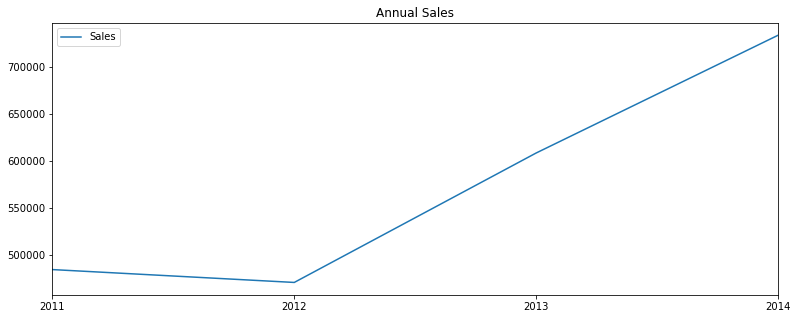

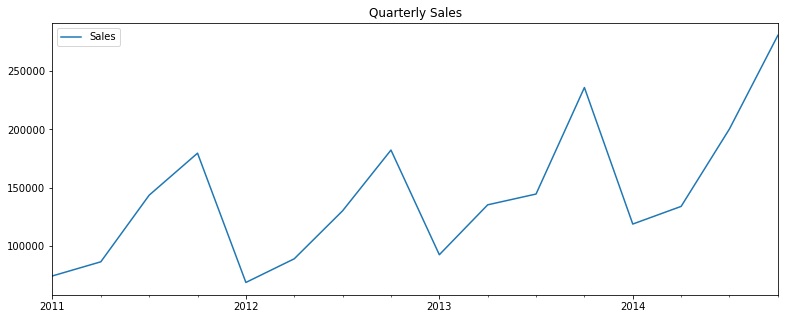

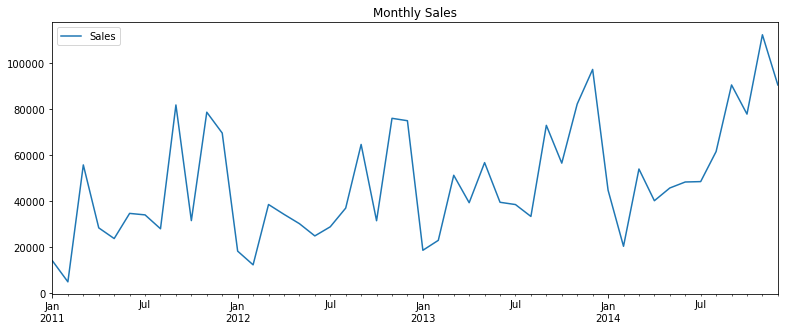

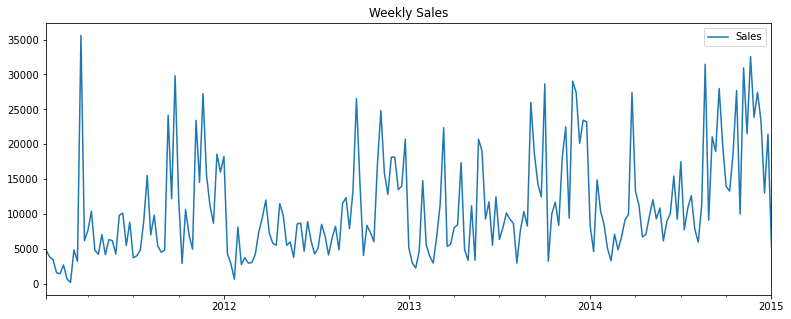

In [8]:
plotsize = (13, 5)

sales_annual.plot(figsize=plotsize, title='Annual Sales')
sales_quarterly.plot(figsize=plotsize, title='Quarterly Sales')
sales_monthly.plot(figsize=plotsize, title='Monthly Sales')
sales_weekly.plot(figsize=plotsize, title='Weekly Sales')

### Decomposition models

In [12]:
# additive
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=sales_weekly, model='additive', period=10)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

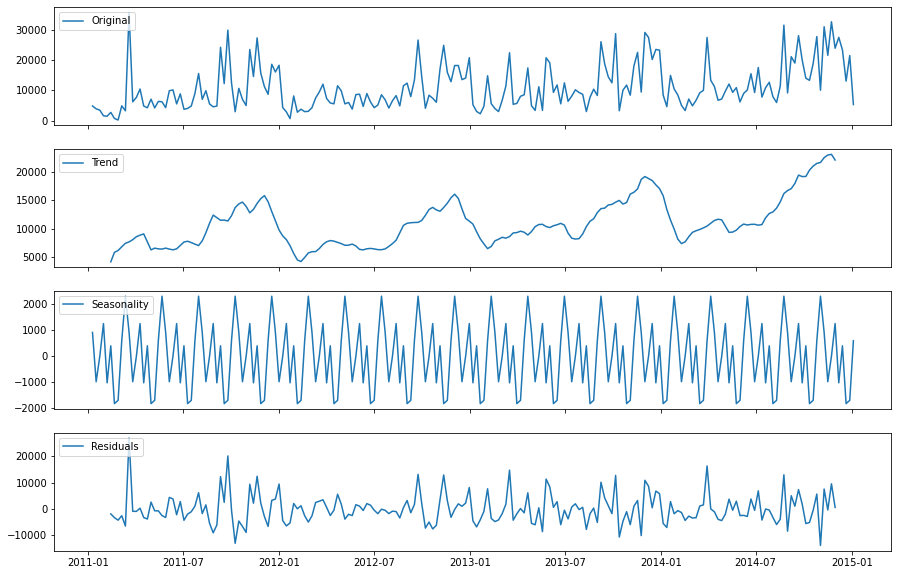

In [13]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(sales_weekly, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

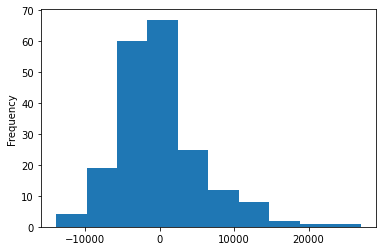

In [14]:
estimated_residual.plot(kind='hist')

In [15]:
from scipy import stats

stats.normaltest(estimated_residual.dropna())

NormaltestResult(statistic=46.95641406355635, pvalue=6.361276031785833e-11)

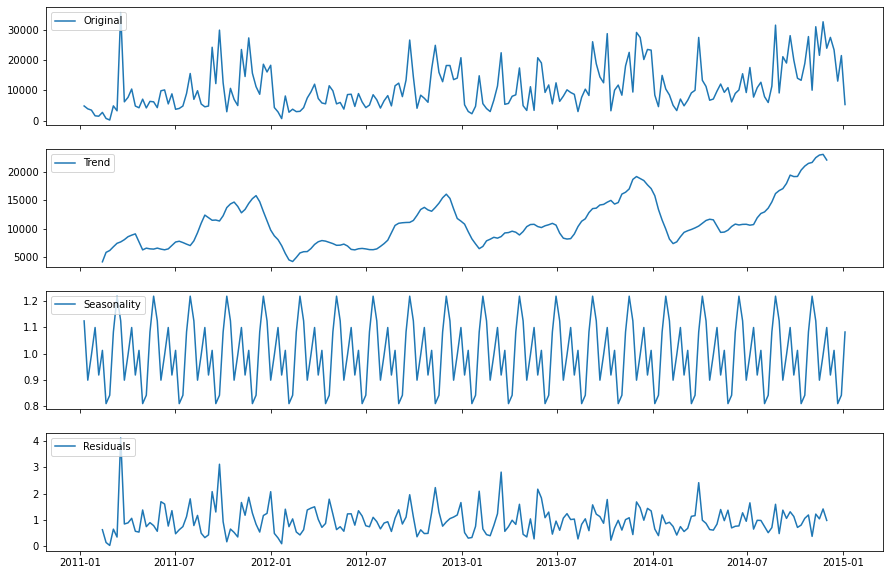

In [16]:
ss_decomposition = seasonal_decompose(x=sales_weekly, model='multiplicative', period=10)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(sales_weekly, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

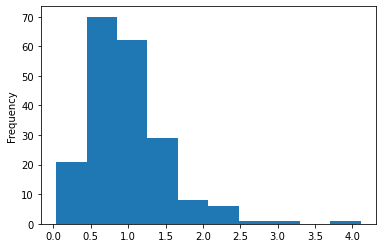

In [17]:
estimated_residual.plot(kind='hist')

In [18]:
stats.normaltest(estimated_residual.dropna())

NormaltestResult(statistic=90.3028617364538, pvalue=2.4602697333927076e-20)

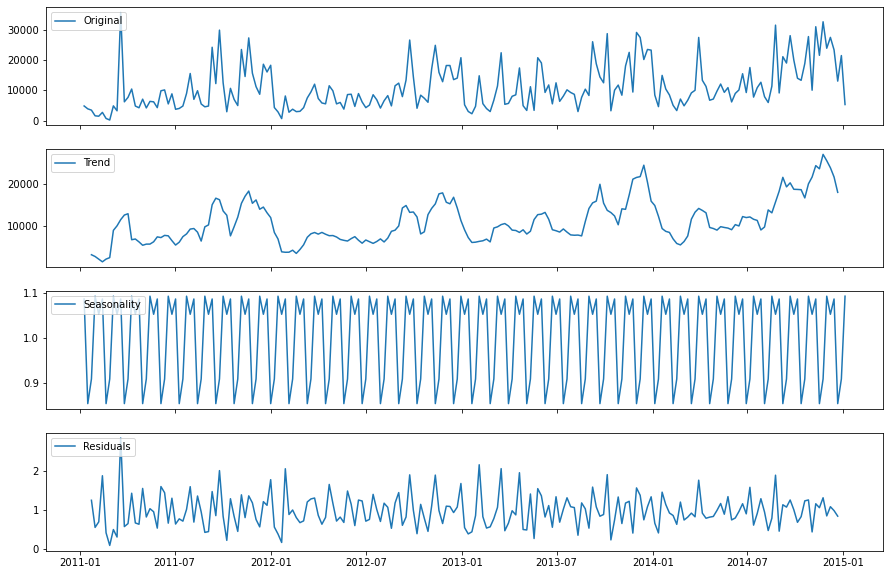

In [19]:
ss_decomposition = seasonal_decompose(x=sales_weekly, model='multiplicative', period=5)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(sales_weekly, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

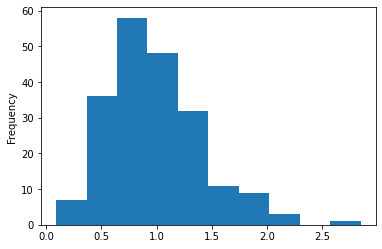

In [20]:
estimated_residual.plot(kind='hist')

In [21]:
stats.normaltest(estimated_residual.dropna())

NormaltestResult(statistic=26.33493361212702, pvalue=1.911797218817165e-06)